Simple test of kmeans sample.

In [1]:
%matplotlib inline

In [2]:
from kmeans_radec import kmeans_sample, KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_randoms_radec(minra, maxra, mindec, maxdec, N, raoffset=0):
    r = 1.0
    # this z is not redshift!
    zmin = r * np.sin(np.pi * mindec / 180.)
    zmax = r * np.sin(np.pi * maxdec / 180.)

    phimin = np.pi / 180. * (minra - 180 + raoffset)
    phimax = np.pi / 180. * (maxra - 180 + raoffset)

    # generate ra and dec
    z_coord = np.random.uniform(zmin, zmax, N)  # not redshift!
    phi = np.random.uniform(phimin, phimax, N)
    dec_rad = np.arcsin(z_coord / r)

    # convert to ra and dec
    random_ra = phi * 180 / np.pi + 180 - raoffset
    random_dec = dec_rad * 180 / np.pi
    
    return random_ra, random_dec

In [4]:
def plot_centers(centers, x_min=0, x_max=360, y_min=-180, y_max=180, h=1):
    km = KMeans(centers)
    # h is Step size of the mesh. Decrease to increase the quality of the VQ.

    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = km.find_nearest(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    zz = Z.reshape(xx.shape)

    number = np.arange(len(centers))
    plt.pcolor(xx, yy, zz)
    for ith, center in enumerate(centers):
        plt.text(center[0], center[1], ith, color='white', fontsize=15)

X (200, 2)  centers (10, 2)  tol=1e-05  maxiter=100
13 iterations  cluster sizes: [17 19 23 10 32 18 24 18 22 17]
X (10000, 2)  centers (10, 2)  tol=1e-05  maxiter=100
15 iterations  cluster sizes: [1073  897 1058  978 1109 1071 1162  946  859  847]
[[ 66.80139734   6.77190946]
 [ 62.71982629   0.43353571]
 [ 53.39561819  -6.88489535]
 [ 60.03242002   7.19252903]
 [ 59.67408007  -6.14570498]
 [ 53.19975452   6.59224618]
 [ 66.30469991  -6.80694441]
 [ 52.52411887  -0.54588937]
 [ 57.60378595   1.01592363]
 [ 67.72467178  -0.07031093]]


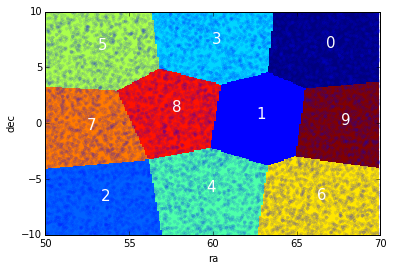

In [5]:
# first sample points that do not cross over ra=360
minra = 50
maxra = 70
mindec = -10
maxdec = 10
N = 10000
raoffset = 0
ncen = 10
h = 0.1

ra, dec = generate_randoms_radec(minra, maxra, mindec, maxdec, N, raoffset)
plt.plot(ra, dec, '.', alpha=0.1)
plt.xlabel('ra')
plt.ylabel('dec')
X = np.vstack((ra, dec)).T
km = kmeans_sample(X, ncen)
plot_centers(km.centers, minra, maxra, mindec, maxdec, h)
print(km.centers)

(-10, 10)
X (200, 2)  centers (10, 2)  tol=1e-05  maxiter=100
8 iterations  cluster sizes: [26 20 18 13 23  8 23 23 19 27]
X (10000, 2)  centers (10, 2)  tol=1e-05  maxiter=100
21 iterations  cluster sizes: [1043  779  960  990 1111  980  931  991 1245  970]
[[  6.84390076e+00  -6.84196467e+00]
 [  2.72522439e+00  -2.24221287e+00]
 [  3.53166522e+02  -6.73593140e+00]
 [  3.52799022e+02  -3.01744903e-01]
 [  7.54677415e-01   6.74382164e+00]
 [  6.84223562e+00   6.61564069e+00]
 [  7.19930951e+00   3.71193701e-01]
 [  3.59414861e+02  -6.90095456e+00]
 [  3.53563203e+02   6.67261921e+00]
 [  3.58539627e+02   9.36586720e-01]]


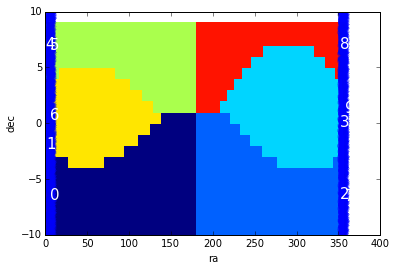

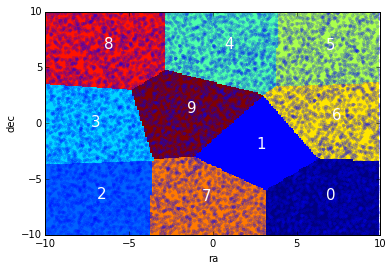

In [6]:
# now sample ones that do cross over the zero line
# first sample points that do not cross over ra=360
minra = 350 
maxra = 370
mindec = -10
maxdec = 10
N = 10000
raoffset = -180
ncen = 10
h = 0.1

phimin = (minra - 180 + raoffset)
phimax = (maxra - 180 + raoffset)
print(phimin, phimax)

ra, dec = generate_randoms_radec(minra, maxra, mindec, maxdec, N, raoffset)
ra = np.where(ra > 360, ra - 360, ra)
plt.plot(ra, dec, '.', alpha=0.2)
plt.xlabel('ra')
plt.ylabel('dec')
X = np.vstack((ra, dec)).T
km = kmeans_sample(X, ncen)
plot_centers(km.centers, 0, 360, mindec, maxdec, 10 * h)
print(km.centers)

# make rotated figure
plt.figure()
centers = km.centers.copy()
centers[:,0] = np.where(centers[:,0] > 180, centers[:,0] - 360, centers[:,0])
ra = np.where(ra > 180, ra - 360, ra)
plt.plot(ra, dec, '.', alpha=0.2)
plt.xlabel('ra')
plt.ylabel('dec')
plot_centers(centers, minra - 360, maxra - 360, mindec, maxdec, h)